# Download SVHN and extract from label file

In [1]:
import imp

svhn_images = imp.load_source('svhn_images', '../modules/svhn_images.py')

In [ ]:
import os

image_path='/flat2/raw'
if not os.path.exists(image_path): 
    os.makedirs(image_path)

for data_kind in ['train', 'test']:
    print "Processing %s, please give this a few minutes to complete" % data_kind

    svhn_images.download_and_extract_SVHN(data_kind, image_path, '../data/SVHN/%s' % data_kind)

    print "Finished processing %s" % data_kind

# Data Exploration

Train data set:
Number of 1-digit sequences=5137
Number of 2-digit sequences=18130
Number of 3-digit sequences=8691
Number of 4-digit sequences=1434
Number of 5-digit sequences=9
Number of 6-digit sequences=1
Test data set:
Number of 1-digit sequences=2483
Number of 2-digit sequences=8356
Number of 3-digit sequences=2081
Number of 4-digit sequences=146
Number of 5-digit sequences=2


<Container object of 5 artists>

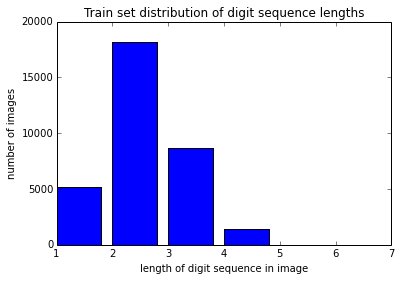

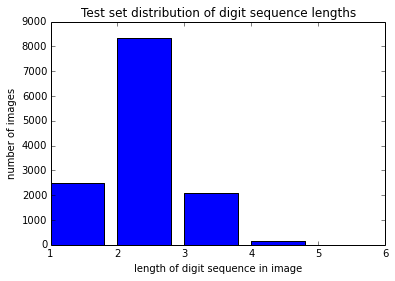

In [26]:
image_path='/flat2/raw'

image_counts = svhn_images.count_images_by_length(image_path, data_kind='train')

train_numbers=[]
print "Train data set:"
for (k,v) in image_counts.items():
    print "Number of %d-digit sequences=%d" %(k, v)
    train_numbers.append(v)
    
image_counts = svhn_images.count_images_by_length(image_path, data_kind='test')

test_numbers=[]
print "Test data set:"
for k,v in image_counts.items():
    print "Number of %d-digit sequences=%d" %(k, v)
    test_numbers.append(v)
    
import matplotlib.pyplot as plt

plt.figure()
plt.title("Train set distribution of digit sequence lengths")
plt.xlabel("length of digit sequence in image")
plt.ylabel("number of images")
plt.bar( range(1, len(train_numbers)+ 1), train_numbers)

plt.figure()
plt.title("Test set distribution of digit sequence lengths")
plt.xlabel("length of digit sequence in image")
plt.ylabel("number of images")
plt.bar( range(1, len(test_numbers)+ 1), test_numbers)

(61, 145, 3)
(91, 183, 3)
(67, 158, 3)
(56, 116, 3)
(75, 145, 3)
(62, 143, 3)
(142, 314, 3)
(42, 81, 3)
(27, 55, 3)
(73, 153, 3)


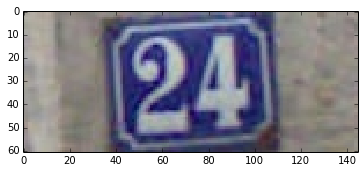

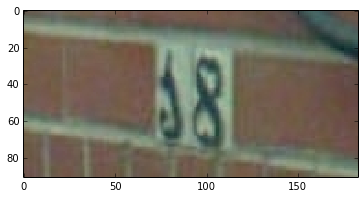

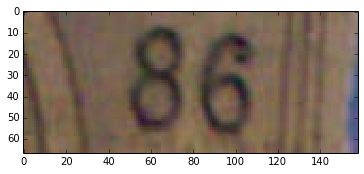

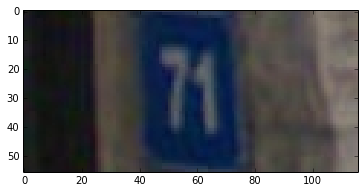

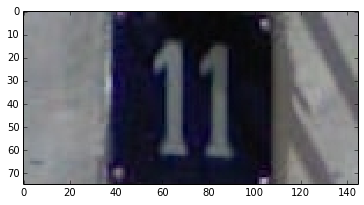

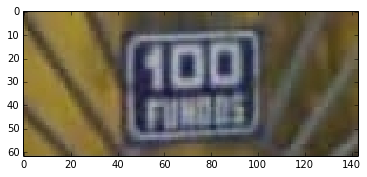

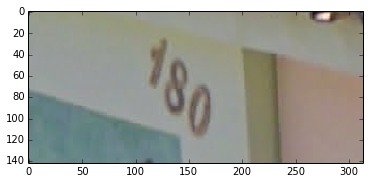

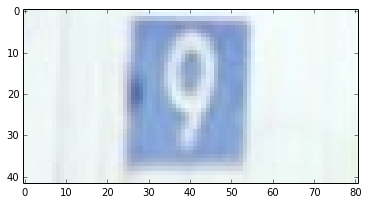

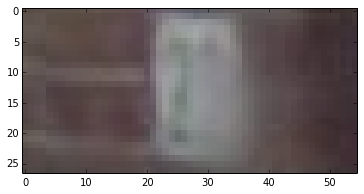

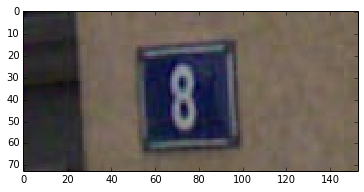

In [3]:
sample_of_images = svhn_images.get_list_of_filenames(image_path, data_kind='train', batch_size=10, max_sequence_length=3)

%matplotlib inline
import matplotlib.image as mpimg

for f in [ "%s/images/%s/%s" % (image_path, 'train', png) for png in sample_of_images]:
    
    plt.figure()
    img = mpimg.imread(f)
    
    print img.shape
    plt.imshow(img, cmap='Greys', interpolation='nearest')

# Explore sample after image preprocessing

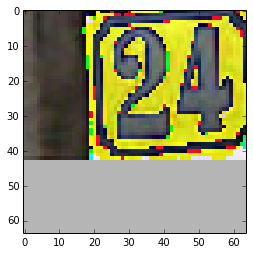

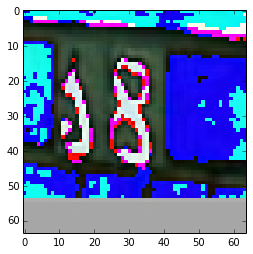

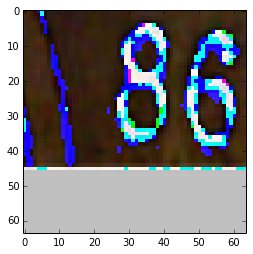

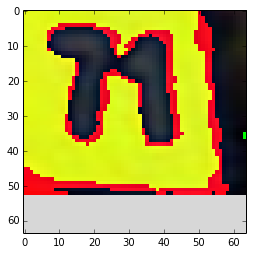

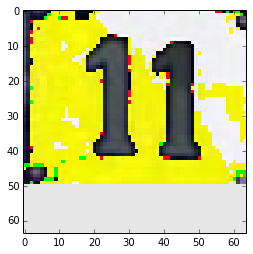

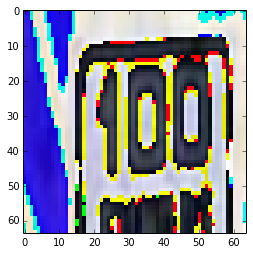

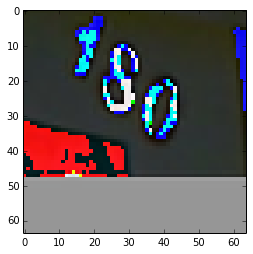

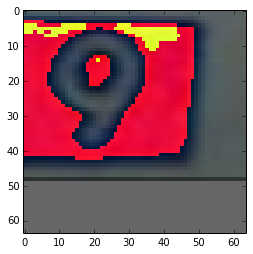

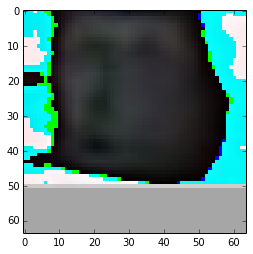

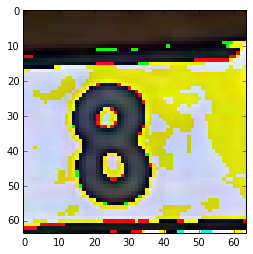

In [27]:
X, y1, y2, y3 = svhn_images.load_batch(sample_of_images, image_path, 'train', 10, 64, 3)

for i,_ in enumerate(sample_of_images):
    
    plt.figure()
    
    plt.imshow(X[i].reshape(64,64,3), cmap='Greys', interpolation='nearest')

# Load saved trained model

In [28]:
model = imp.load_source('model', '../modules/model.py')

m = model.Model()
tf_graph = m.getGraph()
session = m.init_interactive_session(tf_graph)

In [33]:
m.load_saved_model('../models/SVHN_model', session)

# Demostrate a few learning epochs

Note that the training phase was done over 48 hours, and here only a handful of ephocs are demonstrated

In [30]:
import random

keep_prob=0.5
image_path='/flat2/raw'

# Total test set with 3 digits or less is 31958
NUMBER_OF_TRAIN_IMAGES = 31958
train_images_filenames = svhn_images.get_list_of_filenames(image_path, data_kind='train', batch_size=NUMBER_OF_TRAIN_IMAGES, max_sequence_length=3)

batch_size = 128

#running 10 epochs for demonstration only
for i in range(10):
    offset = random.randint(0, NUMBER_OF_TRAIN_IMAGES - batch_size)
    x, y1, y2, y3 = svhn_images.load_batch(train_images_filenames[offset:(offset+batch_size)],\
                                       image_path, 'train', 10, 64, 3)           
    m.run_training_epoch(session, x, y1, y2, y3, keep_prob=keep_prob)

# Test model against the test set

In [31]:
# Total test set with 3 digits or less is 12920
image_path='/flat2/raw'

NUMBER_OF_TEST_IMAGES = 12920

test_images_filenames = svhn_images.get_list_of_filenames(image_path, data_kind='test', batch_size=NUMBER_OF_TEST_IMAGES, max_sequence_length=3)

# Test the images against the model in a small batch at a time, to avoid memory exhaustion errors

batch_size = NUMBER_OF_TEST_IMAGES / 20
i=0
digit1 = []
digit2 = []
digit3 = []

while i < (NUMBER_OF_TEST_IMAGES - batch_size):
    batch_images = test_images_filenames[i:i+batch_size]
    X, y1, y2, y3 = svhn_images.load_batch(batch_images, image_path, 'test', 10, 64, 3)
    
    d1_acc, d2_acc, d3_acc = m.test_model(session, X, y1, y2, y3)
    digit1.append(d1_acc)
    digit2.append(d2_acc)
    digit3.append(d3_acc)
    i=i+batch_size

In [32]:
import numpy as np
print "Mean accuracy: digit_1 = %0.3f digit_2 = %0.3f digit_3 = %0.3f " % (np.array(digit1).mean(), np.array(digit2).mean(), np.array(digit3).mean())

Mean accuracy: digit_1 = 0.748 digit_2 = 0.674 digit_3 = 0.895 


In [53]:
print("Min digit 1 accuracy = %.1f" % (min(digit1) * 100 ))
print("Max digit 1 accuracy = %.1f" % (max(digit1) * 100 ))

print("Min digit 2 accuracy = %.1f" % (min(digit2) * 100 ))
print("Max digit 2 accuracy = %.1f" % (max(digit2) * 100 ))

print("Min digit 3 accuracy = %.1f" % (min(digit3) * 100 ))
print("Max digit 3 accuracy = %.1f" % (max(digit3) * 100 ))

Min digit 1 accuracy = 72.1
Max digit 1 accuracy = 77.6
Min digit 2 accuracy = 62.8
Max digit 2 accuracy = 70.6
Min digit 3 accuracy = 86.5
Max digit 3 accuracy = 91.8


{'boxes': [<matplotlib.lines.Line2D at 0x7f995c12c110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f995c12c0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f995c44afd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f995c44a150>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f991ffcad90>,
  <matplotlib.lines.Line2D at 0x7f995c53f790>]}

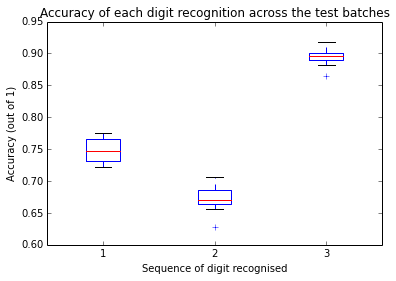

In [55]:
plt.title("Accuracy of each digit recognition across the test batches")
plt.xlabel("Sequence of digit recognised")
plt.ylabel("Accuracy (out of 1)")
plt.boxplot([digit1, digit2, digit3])